### Results

We analyzed `results_multimodal_bert_eval` and `results_QualT5_eval`.  
The comparison focuses on intrinsic metrics (**F1-score, precision, recall, accuracy**) and on the distribution of prediction scores.  
At this stage the analysis is descriptive only: no statistical tests are applied yet, but the overview highlights how multimodal BERT and QualT5 differ in capturing the underlying signal.


In [ ]:
import pandas as pd
import numpy as np
multi_modal=pd.read_csv("results_multimodal_bert_eval.csv")
qualt5=pd.read_csv("results_QualT5_eval.csv")
# count the number of rows in the dataframe
row_count = multi_modal.shape[0]
# kdb plot with score 

print(row_count)



7250000


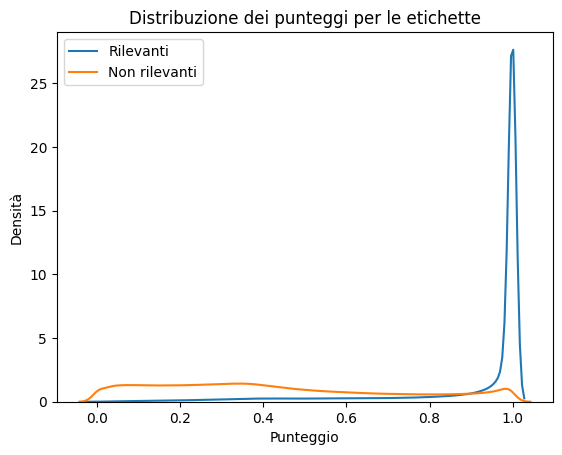

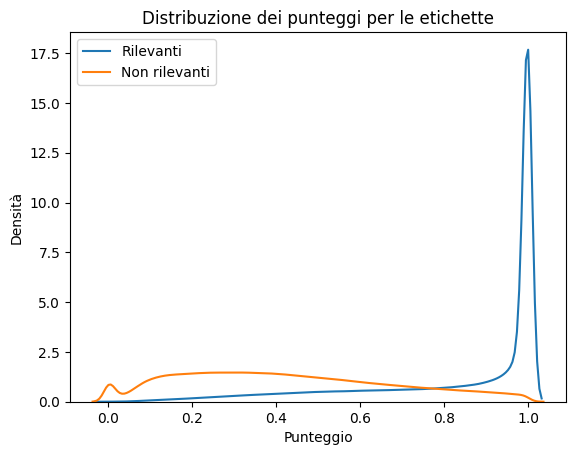

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.kdeplot(data=multi_modal[multi_modal["label"]==1], x="score", label="Rilevanti")
sns.kdeplot(data=multi_modal[multi_modal["label"]==0], x="score", label="Non rilevanti")
#save the plot
plt.title("Distribuzione dei punteggi per le etichette")
plt.xlabel("Punteggio")
plt.ylabel("Densità")
plt.legend()
plt.savefig("score_distribution.png", dpi=300)
# fallo per entrambi i dataset
plt.figure()
sns.kdeplot(data=qualt5[qualt5["label"]==1], x="score", label="Rilevanti")
sns.kdeplot(data=qualt5[qualt5["label"]==0], x="score", label="Non rilevanti")
#save the plot
plt.title("Distribuzione dei punteggi per le etichette")
plt.xlabel("Punteggio")
plt.ylabel("Densità")
plt.legend()
plt.savefig("score_distribution_qualt5.png", dpi=300)


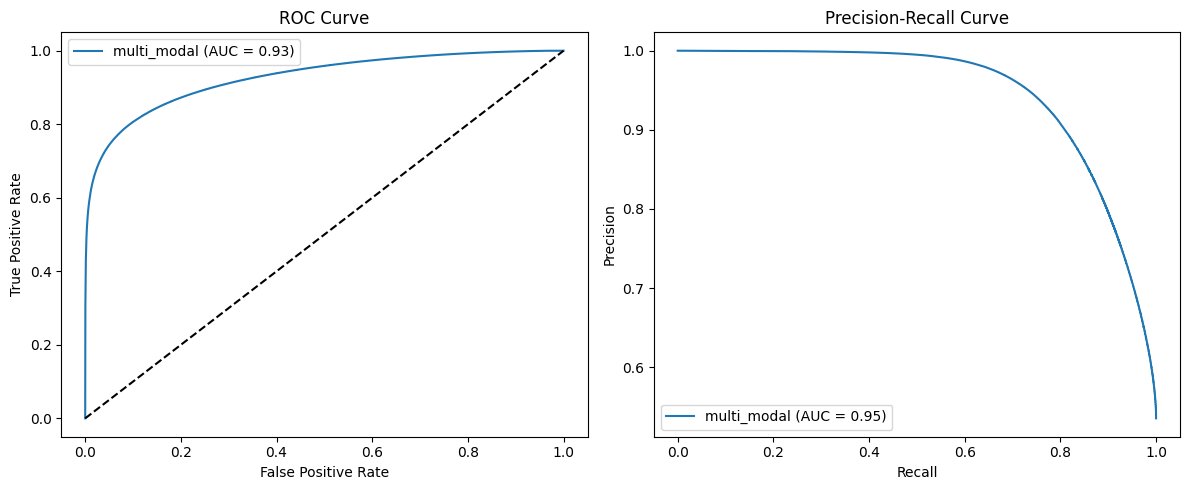

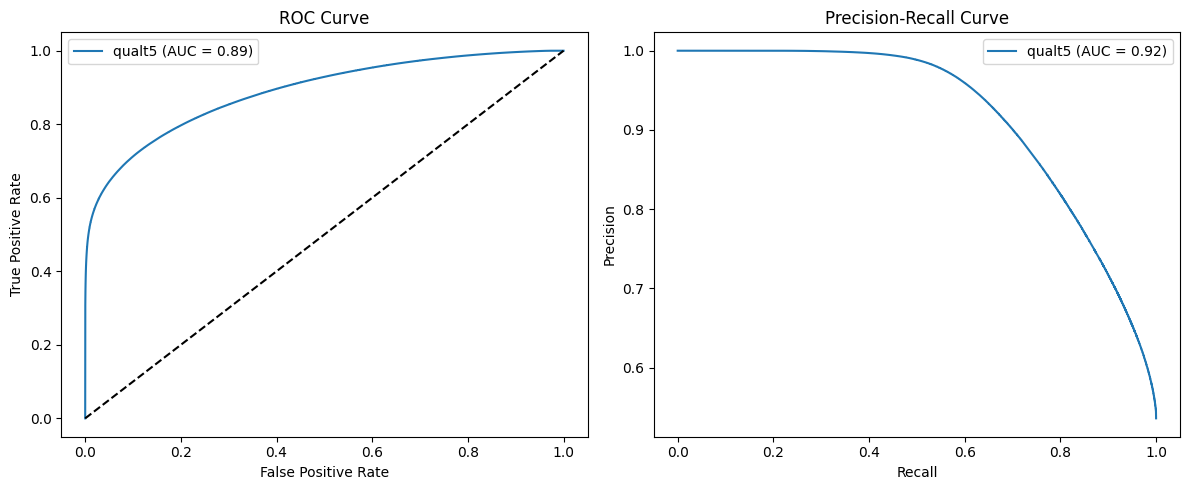

In [7]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc

# ROC e PR per multi_modal
fpr_mm, tpr_mm, _ = roc_curve(multi_modal["label"], multi_modal["score"])
precision_mm, recall_mm, _ = precision_recall_curve(multi_modal["label"], multi_modal["score"])
roc_auc_mm = auc(fpr_mm, tpr_mm)
pr_auc_mm = auc(recall_mm, precision_mm)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(fpr_mm, tpr_mm, label=f"multi_modal (AUC = {roc_auc_mm:.2f})")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(recall_mm, precision_mm, label=f"multi_modal (AUC = {pr_auc_mm:.2f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()

plt.tight_layout()
plt.show()

# ROC e PR per qualt5
fpr_qt, tpr_qt, _ = roc_curve(qualt5["label"], qualt5["score"])
precision_qt, recall_qt, _ = precision_recall_curve(qualt5["label"], qualt5["score"])
roc_auc_qt = auc(fpr_qt, tpr_qt)
pr_auc_qt = auc(recall_qt, precision_qt)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(fpr_qt, tpr_qt, label=f"qualt5 (AUC = {roc_auc_qt:.2f})")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(recall_qt, precision_qt, label=f"qualt5 (AUC = {pr_auc_qt:.2f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()

plt.tight_layout()
plt.show()


In [8]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

def threshold_metrics(df, label_col="label", score_col="score"):
    results = []
    thresholds = np.arange(0.5, 1.0, 0.05)
    for thresh in thresholds:
        preds = (df[score_col] >= thresh).astype(int)
        precision = precision_score(df[label_col], preds)
        recall = recall_score(df[label_col], preds)
        accuracy = accuracy_score(df[label_col], preds)
        f1 = f1_score(df[label_col], preds)
        results.append({
            "threshold": round(thresh, 2),
            "precision": precision,
            "recall": recall,
            "accuracy": accuracy,
            "f1-score": f1
        })
    return pd.DataFrame(results)

print("Risultati multi_modal:")
print(threshold_metrics(multi_modal))

print("\nRisultati qualt5:")
print(threshold_metrics(qualt5))


Risultati multi_modal:
   threshold  precision    recall  accuracy  f1-score
0       0.50   0.749995  0.927818  0.795788  0.829483
1       0.55   0.771202  0.915455  0.809345  0.837160
2       0.60   0.791371  0.902785  0.820546  0.843415
3       0.65   0.810760  0.889707  0.829784  0.848401
4       0.70   0.829534  0.875827  0.837176  0.852052
5       0.75   0.848347  0.860692  0.843056  0.854475
6       0.80   0.867427  0.843698  0.847296  0.855398
7       0.85   0.887836  0.823134  0.849647  0.854261
8       0.90   0.911025  0.796168  0.849254  0.849733
9       0.95   0.940018  0.752326  0.841711  0.835764

Risultati qualt5:
   threshold  precision    recall  accuracy  f1-score
0       0.50   0.735924  0.882958  0.767519  0.802764
1       0.55   0.762751  0.857553  0.780751  0.807378
2       0.60   0.789643  0.830868  0.790778  0.809731
3       0.65   0.816096  0.802797  0.797401  0.809392
4       0.70   0.842287  0.773404  0.800991  0.806378
5       0.75   0.868149  0.742506  0.801

In [1]:

import pandas as pd
inference=pd.read_csv("inference_outputs.csv", nrows=5000000)

Media: 0.8354660268261974, Varianza: 0.04406208736518199


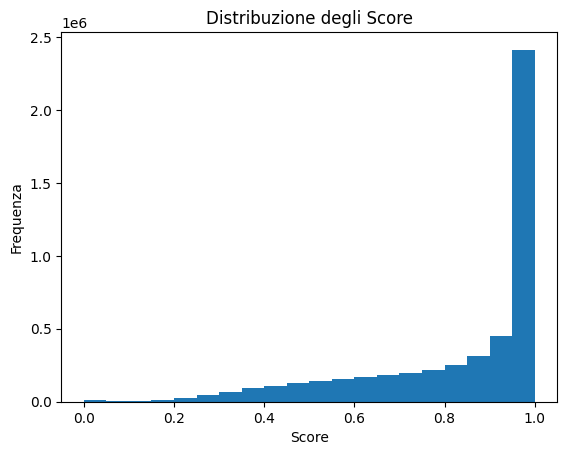

Migliori 25 URL:
154     https://www.azlyrics.com/lyrics/vanmorrison/th...
419                       https://twitter.com/seth_jones3
606                   https://twitter.com/WarzoneInformer
932                         https://twitter.com/akheriaty
1226        https://www.instagram.com/evangelinelomelino/
1262    https://www.quora.com/I-have-a-laptop-with-an-...
1362    https://www.azlyrics.com/lyrics/bush/machinehe...
1730    https://www.quora.com/I-just-had-my-chipped-to...
1967    https://www.researchgate.net/post/Calculate-th...
2150    https://www.azlyrics.com/lyrics/cg5/manonstilt...
2270    https://www.azlyrics.com/lyrics/citymorgue/hot...
2345         https://hotlinemiami.fandom.com/wiki/Richard
2444    https://www.researchgate.net/post/Please_let_m...
2629    https://www.azlyrics.com/lyrics/charlixcx/redb...
2773    https://www.quora.com/How-many-crew-members-wi...
3081    https://www.quora.com/How-do-I-know-if-the-Win...
3187    https://www.quora.com/How-can-I-run-both-WiFi-.

In [2]:
# leggi gli score calcola media varianza e grafico a istogrammi per bucket della distribuzione stampa i 25 migliori url per score e i 25 peggiori
import matplotlib.pyplot as plt

# Calcola media e varianza
mean_score = inference['score'].mean()
var_score = inference['score'].var()
print(f"Media: {mean_score}, Varianza: {var_score}")

# Grafico a istogrammi
plt.hist(inference['score'], bins=20)
plt.xlabel("Score")
plt.ylabel("Frequenza")
plt.title("Distribuzione degli Score")
plt.show()

# Stampa i 25 migliori e peggiori URL
print("Migliori 25 URL:")
print(inference.nlargest(25, 'score')['url'])

print("Peggiori 25 URL:")
print(inference.nsmallest(25, 'score')['url'])
# save it in a txt file
with open("migliori_url.txt", "w") as f:
    f.write("\n".join(inference.nlargest(25, 'score')['url']))

with open("peggiori_url.txt", "w") as f:
    f.write("\n".join(inference.nsmallest(25, 'score')['url']))


### Last steps

- Use both models (Multimodal-BERT and QualT5) as **hub scores** inside the crawler.  
- Compare the crawling performance with the **older baseline results**.  
- Run a small test on **intrinsic metrics** (precision, recall, F1, accuracy, Brier) at different thresholds.  
 
- Write my thesis
